<a href="https://colab.research.google.com/github/virajyadav/google_colab_experiments/blob/main/MultiGarmentNetwork_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A demo of https://github.com/bharat-b7/MultiGarmentNetwork running on Colab

In [1]:
!test -d .git || rm -rf {,.[!.],..?}*

In [2]:
!test -d .git || git clone --quiet https://github.com/bharat-b7/MultiGarmentNetwork.git .

Download digital wardrobe: [Part-1](https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip) and [Part-2](https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip).
This dataset contains scans, SMPL registration, texture_maps, segmentation_maps and multi-mesh registered garments.

In [3]:
!test -f Multi-Garmentdataset.zip || wget -q -nc https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip

In [4]:
!test -f Multi-Garmentdataset_02.zip || wget -q -nc https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip

In [5]:
!test -d Multi-Garmentdataset || unzip -qn Multi-Garmentdataset.zip

In [6]:
!test -d Multi-Garmentdataset_02 || unzip -qn Multi-Garmentdataset_02.zip

Download the neutral SMPL model from http://smplify.is.tue.mpg.de/ and place it in the assets folder.

In [7]:
!mkdir -p assets
!test -f mpips-smplify_public_v2.zip || gdown --id 1BwNtKvArmUdy4Cpkx1seIlsHinopdaws
!test -f assets/neutral_smpl.pkl || unzip -n -p mpips-smplify_public_v2.zip smplify_public/code/models/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl > assets/neutral_smpl.pkl

Downloading...
From: https://drive.google.com/uc?id=1BwNtKvArmUdy4Cpkx1seIlsHinopdaws
To: /content/mpips-smplify_public_v2.zip
100% 53.0M/53.0M [00:00<00:00, 73.2MB/s]


In [15]:
!rm -rf  dirt_dir/

Download and install DIRT: https://github.com/pmh47/dirt.

In [16]:
!pip uninstall -y tensorflow tensor2tensor tensorboard tensorboardcolab tensorflow-datasets tensorflow-estimator tensorflow-gan tensorflow-hub tensorflow-metadata tensorflow-privacy tensorflow-probability
!pip install tensorflow-gpu==1.15

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
Found existing installation: tensorboard 2.8.0
Uninstalling tensorboard-2.8.0:
  Successfully uninstalled tensorboard-2.8.0
Found existing installation: tensorflow-datasets 4.0.1
Uninstalling tensorflow-datasets-4.0.1:
  Successfully uninstalled tensorflow-datasets-4.0.1
Found existing installation: tensorflow-estimator 2.7.0
Uninstalling tensorflow-estimator-2.7.0:
  Successfully uninstalled tensorflow-estimator-2.7.0
Found existing installation: tensorflow-hub 0.12.0
Uninstalling tensorflow-hub-0.12.0:
  Successfully uninstalled tensorflow-hub-0.12.0
Found existing installation: tensorflow-metadata 1.6.0
Uninstalling tensorflow-metadata-1.6.0:
  Successfully uninstalled tensorflow-metadata-1.6.0
Found existing installation: tensorflow-probability 0.15.0
Uninstalling tensorflow-probability-0.15.0:
  Successfully uninstalled tensorflow-probability-0.15.0
     |██████

In [17]:
!git clone https://github.com/pmh47/dirt.git dirt-repo
!cd dirt-repo; mkdir build; cd build ; cmake -DOpenGL_GL_PREFERENCE=GLVND -DCMAKE_CUDA_FLAGS='-DNDEBUG' ../csrc
!cd dirt-repo/build ; make -j5
!cd dirt-repo ; pip install -e .

Cloning into 'dirt-repo'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 225 (delta 45), reused 38 (delta 38), pack-reused 159
Receiving objects: 100% (225/225), 373.14 KiB | 4.66 MiB/s, done.
Resolving deltas: 100% (119/119), done.
-- The CXX compiler identification is GNU 7.5.0
-- The CUDA compiler identification is NVIDIA 11.1.105
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc -- works
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Found OpenGL: /usr/lib/x86_64-linux-gnu/libOpenGL.so  found components:  OpenGL EGL 
Trace

In [8]:
!test -d dirt_dir || git clone --quiet https://github.com/pmh47/dirt.git dirt_dir
!sed -i 's|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_30 --expt-relaxed-constexpr -DNDEBUG")|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_60 --expt-relaxed-constexpr -DNDEBUG")|' dirt_dir/csrc/CMakeLists.txt
!cd dirt_dir && pip install -q .

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 497.5 MB 26 kB/s 
     |████████████████████████████████| 1.4 MB 42.5 MB/s 
     |████████████████████████████████| 462 kB 49.1 MB/s 
     |████████████████████████████████| 15.7 MB 37.7 MB/s 
     |████████████████████████████████| 5.8 MB 38.3 MB/s 
  ERROR: Failed building wheel for dirt
    Running setup.py install for dirt ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-q8tk32lb/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-q8tk32lb/setup.py

Download and install mesh packages for visualization: https://github.com/MPI-IS/mesh

In [18]:
!test -d mesh_dir || git clone --quiet https://github.com/MPI-IS/mesh.git mesh_dir

In [19]:
!apt-get install -qq libboost-dev xvfb libosmesa6-dev

Selecting previously unselected package xvfb.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Selecting previously unselected package libosmesa6:amd64.
Preparing to unpack .../libosmesa6_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libosmesa6:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Selecting previously unselected package libosmesa6-dev:amd64.
Preparing to unpack .../libosmesa6-dev_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libosmesa6-dev:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up libosmesa6:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libosmesa6-dev:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [20]:
!cd mesh_dir && make all

----- [ mesh_package ] Installing with the interpreter /usr/local/bin/python (version 3.7.12)
     |████████████████████████████████| 1.1 MB 5.3 MB/s 
     |████████████████████████████████| 11.2 MB 33.5 MB/s 
     |████████████████████████████████| 38.1 MB 137 kB/s 
     |████████████████████████████████| 4.3 MB 41.0 MB/s 
     |████████████████████████████████| 596 kB 37.4 MB/s 
     |████████████████████████████████| 60.4 MB 41 kB/s 
     |████████████████████████████████| 895 kB 51.5 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml

In [21]:
!pip install -q chumpy opendr

     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 581 kB 10.2 MB/s 


Patch Python 2 to Python 3 and fix hardcoded paths

In [22]:
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pkl|import _pickle as pkl|' {} \;
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pickle|import _pickle as pickle|' {} \;
!find ./ -type f -name "*.py" -exec sed -i -r s/pkl\.load[\(]open[\(]\(.+\)[\)][\)]/pkl.load\(open\(\\1,\ \'rb\'\)\ ,\ encoding=\'latin1\'\)/g  {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_release/||" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_final_release/||" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from posemapper|from .posemapper|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from serialization|from .serialization|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from verts|from .verts|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|^import lbs$|from . import lbs|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/RVH/work/data/smpl_models/neutral/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl|assets/neutral_smpl.pkl|" {} \;

In [23]:
from IPython.display import Image

In [26]:
!pip install git+https://github.com/MPI-IS/mesh.git

  Cloning https://github.com/MPI-IS/mesh.git to /tmp/pip-req-build-ltvjq_0h
  Running command git clone -q https://github.com/MPI-IS/mesh.git /tmp/pip-req-build-ltvjq_0h
  Created wheel for psbody-mesh: filename=psbody_mesh-0.4-cp37-cp37m-linux_x86_64.whl size=1855224 sha256=03ab1be161483da48bbfc2b656c742655ffe98fa545de1fb5c49cb3676e82ef2
  Stored in directory: /tmp/pip-ephem-wheel-cache-il0a7ntt/wheels/15/9e/8a/9a8acd7eb649a805222ec1acd1dad2abb02a333d74fb5c6afc
Successfully built psbody-mesh


Load scan and visualize texture and segmentation.

In [24]:
!sed -i "s|scan2.show()|scan2.show().save_snapshot('scan.png', blocking=True)|" visualize_scan.py

In [27]:
!xvfb-run -a python visualize_scan.py

Saving snapshot to scan.png, please wait...
Done


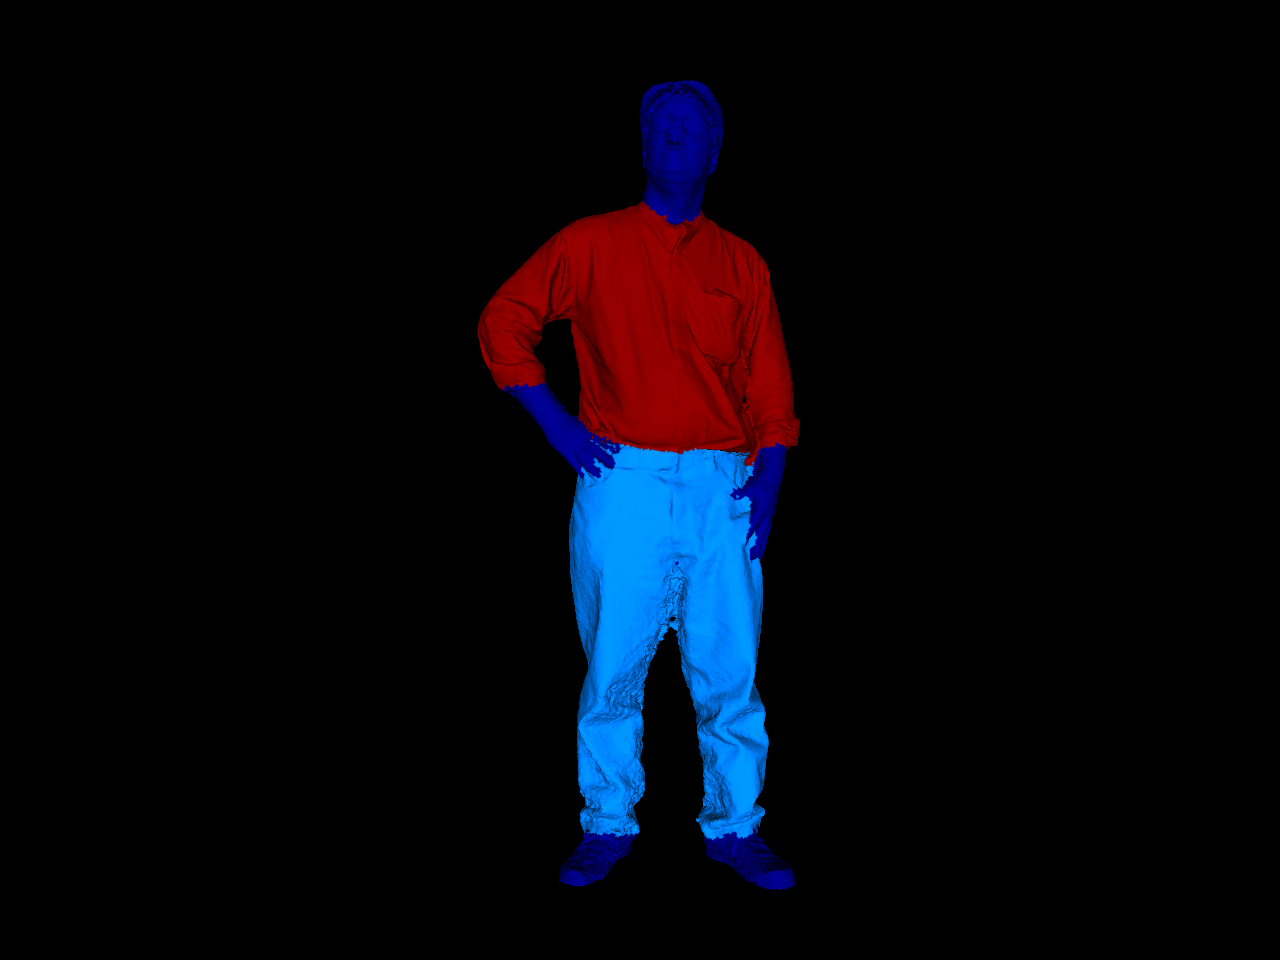

In [ ]:
Image('scan.png')

Visualize random garment and coresponding SMPL model.

In [28]:
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\])|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\]); mvs\[0\]\[1\].save_snapshot('garment_org_body.png', blocking=True)|" visualize_garments.py
!sed -i "s|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\])|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\]); mvs\[0\]\[2\].save_snapshot('garment_org_body_garment_posed.png', blocking=True)|" visualize_garments.py
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('garment_unposed.png', blocking=True)|" visualize_garments.py

In [29]:
!xvfb-run -a python visualize_garments.py

Saving snapshot to garment_org_body.png, please wait...
Saving snapshot to garment_org_body_garment_posed.png, please wait...
Saving snapshot to garment_unposed.png, please wait...
Done


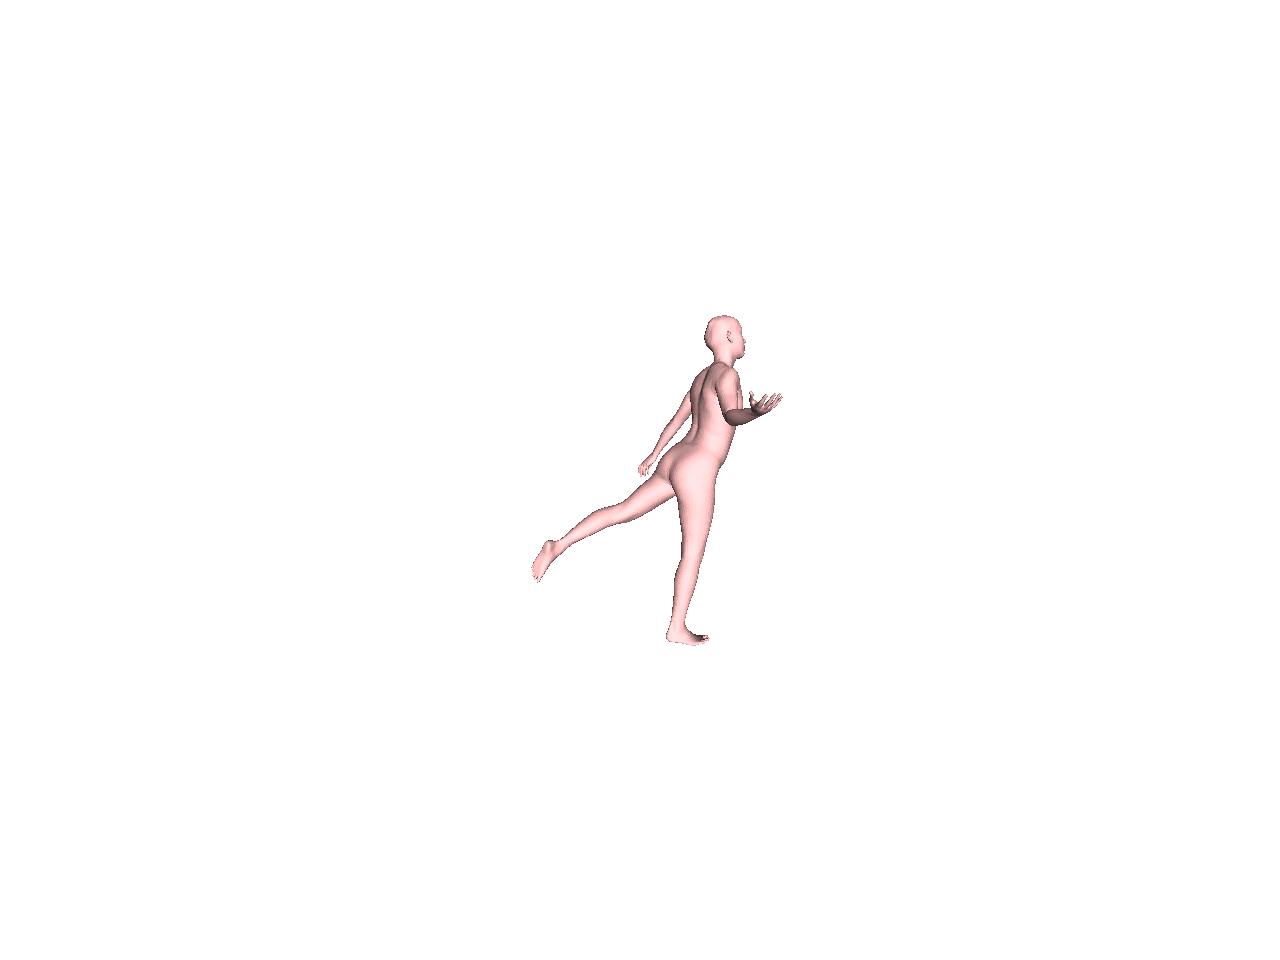

In [30]:
Image('garment_org_body.png')

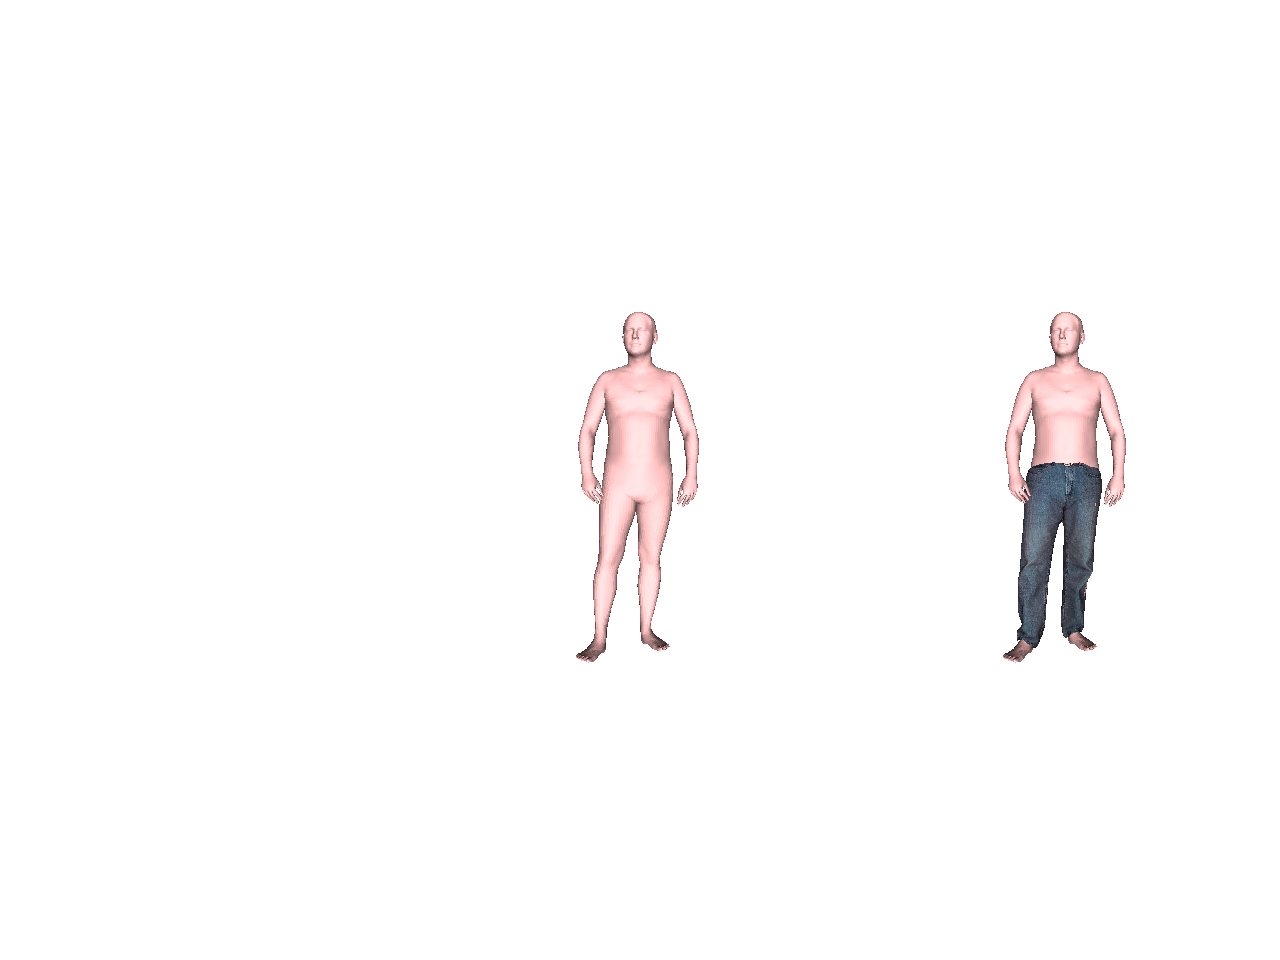

In [ ]:
Image('garment_org_body_garment_posed.png')

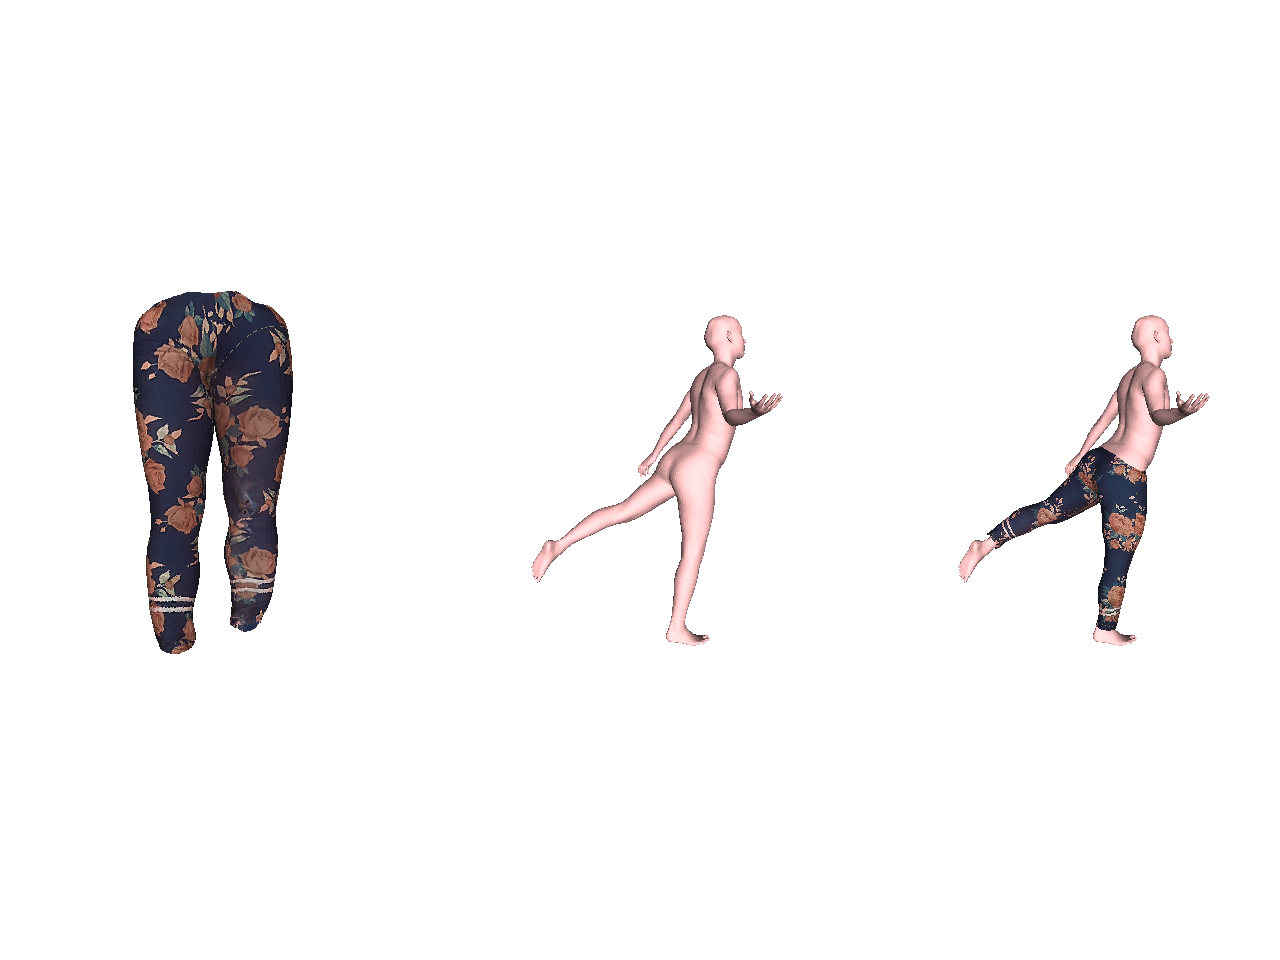

In [31]:
Image('garment_unposed.png')

Load random garment and dress desired SMPL body with it.

In [32]:
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('dress_unposed.png', blocking=True)|" dress_SMPL.py
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[new_garment, tgt_body\])|mvs\[0\]\[1\].set_static_meshes(\[new_garment, tgt_body\]); mvs\[0\]\[1\].save_snapshot('dress_posed.png', blocking=True)|" dress_SMPL.py

Saving snapshot to dress_unposed.png, please wait...
Saving snapshot to dress_posed.png, please wait...
Done


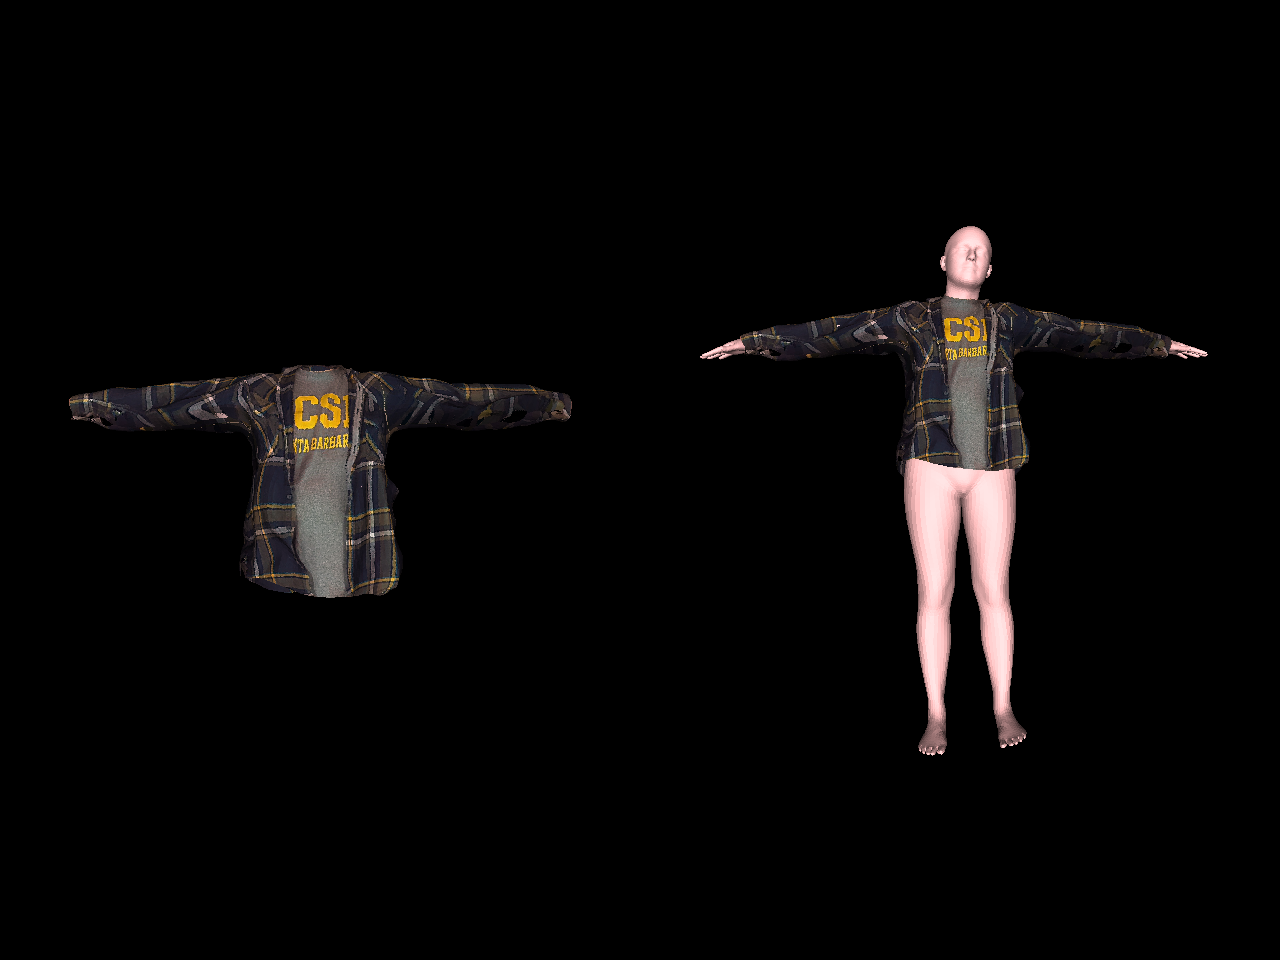

In [34]:
!xvfb-run -a python dress_SMPL.py
Image('dress_posed.png')

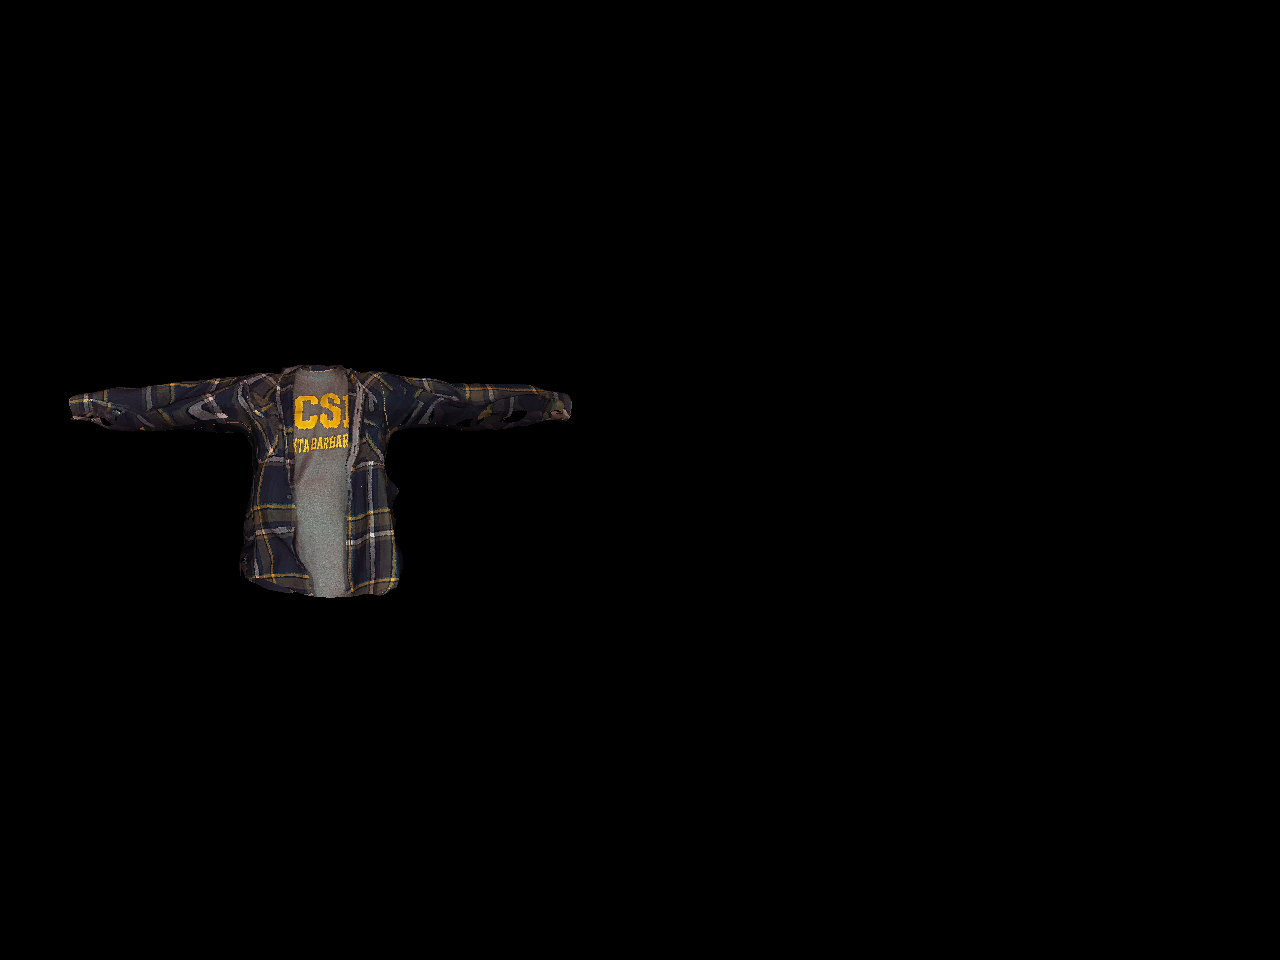

In [35]:
Image('dress_unposed.png')

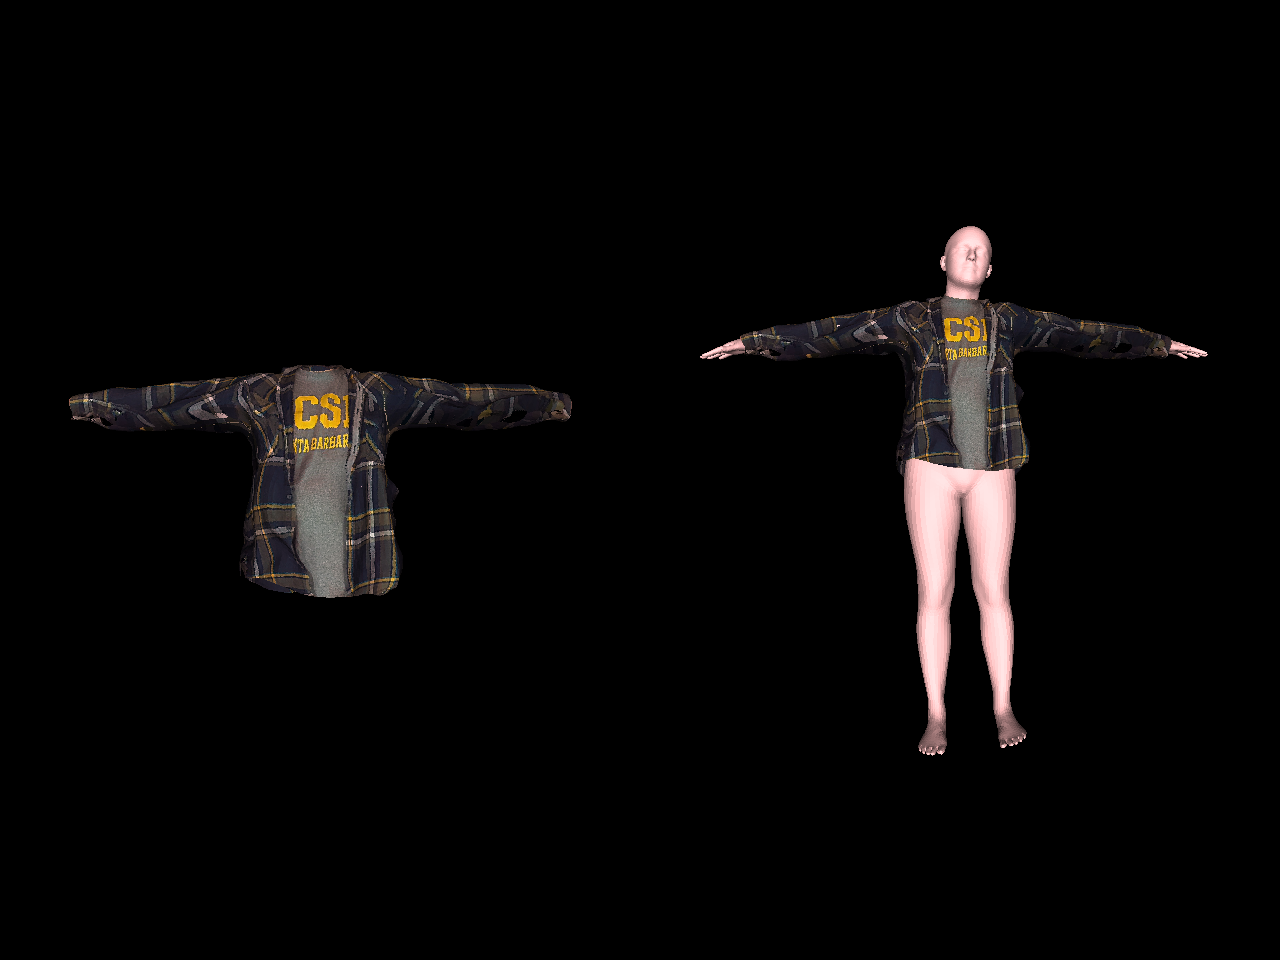

In [36]:
Image('dress_posed.png')